In [20]:
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250

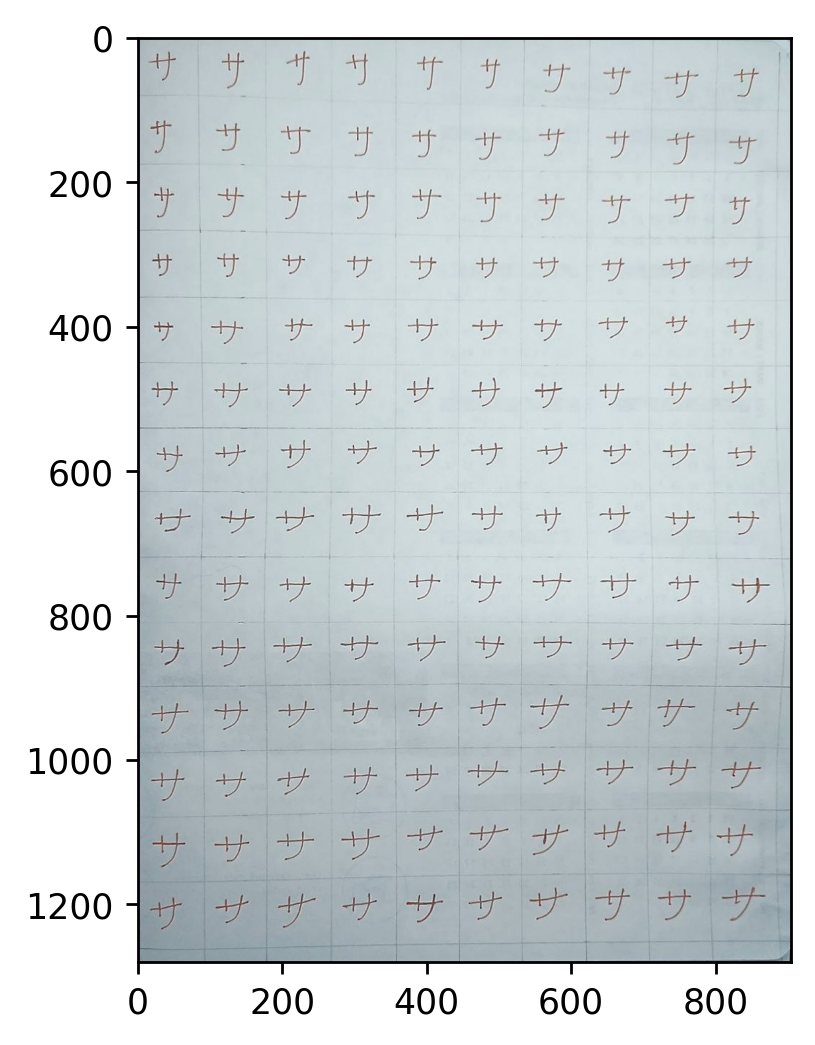

In [21]:
file_name = '../data-raw/0.jpg'
source_img = cv2.imread(file_name, cv2.IMREAD_COLOR)
plt.imshow(source_img)

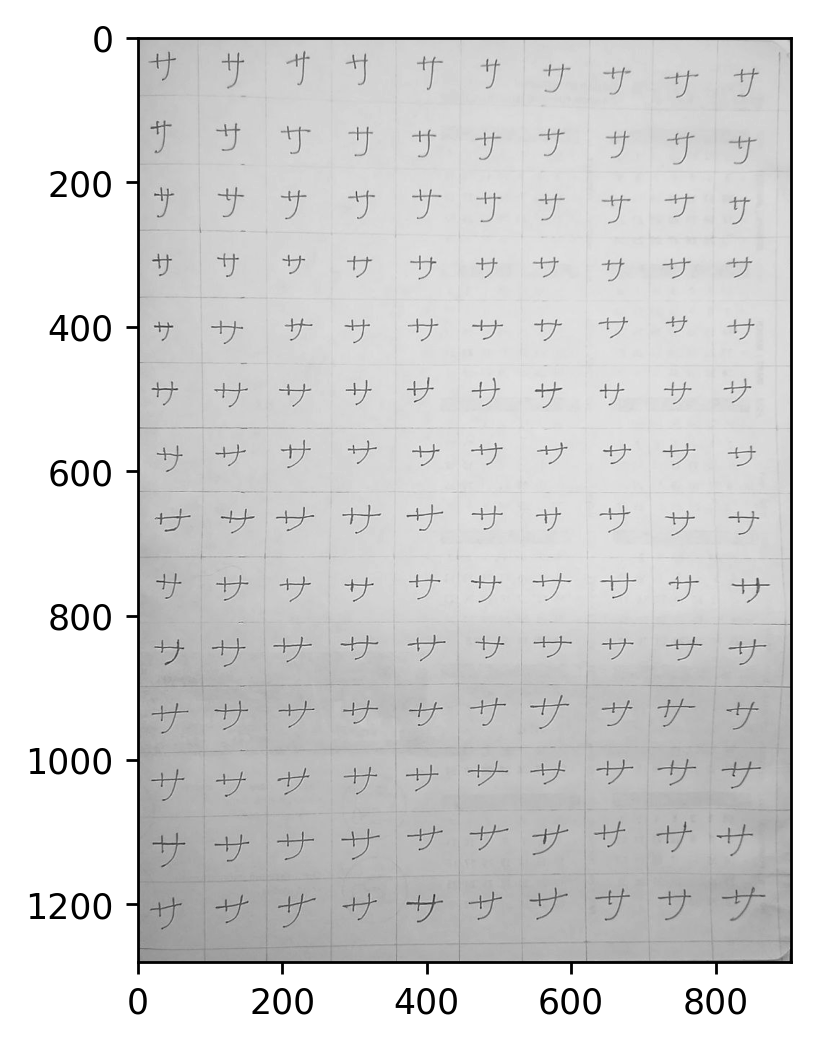

In [22]:
img = cv2.cvtColor(source_img, cv2.COLOR_BGR2GRAY)
h, w = img.shape
plt.imshow(img, cmap='gray')

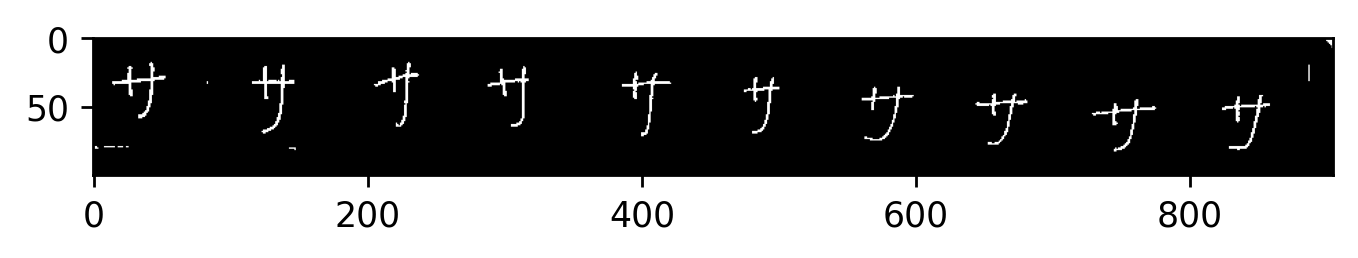

In [23]:
# первый ряд легче обработать отдельно, чтобы не потерять хвостики у символов
first_row = img[0:100, 0:w]
_, first_row_bin = cv2.threshold(first_row, 170, 255, cv2.THRESH_BINARY_INV)
plt.imshow(first_row_bin , cmap='gray')

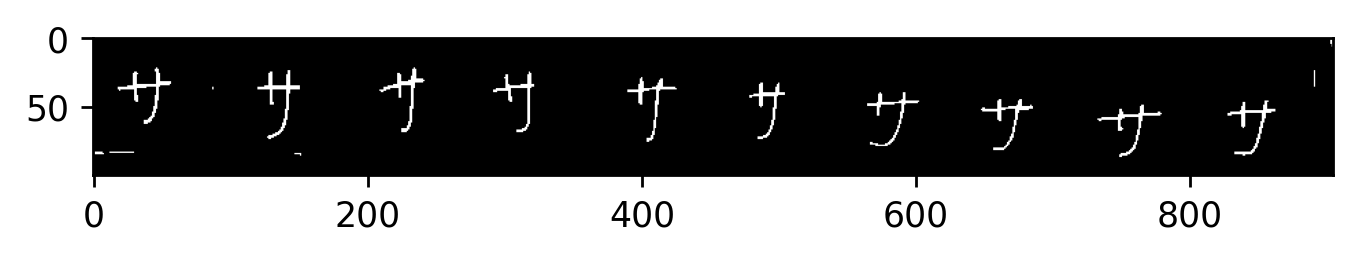

In [24]:
first_row_bin = cv2.morphologyEx(first_row_bin, cv2.MORPH_CLOSE, kernel=np.ones((2,2), np.uint8), iterations=4)
plt.imshow(first_row_bin, cmap='gray')

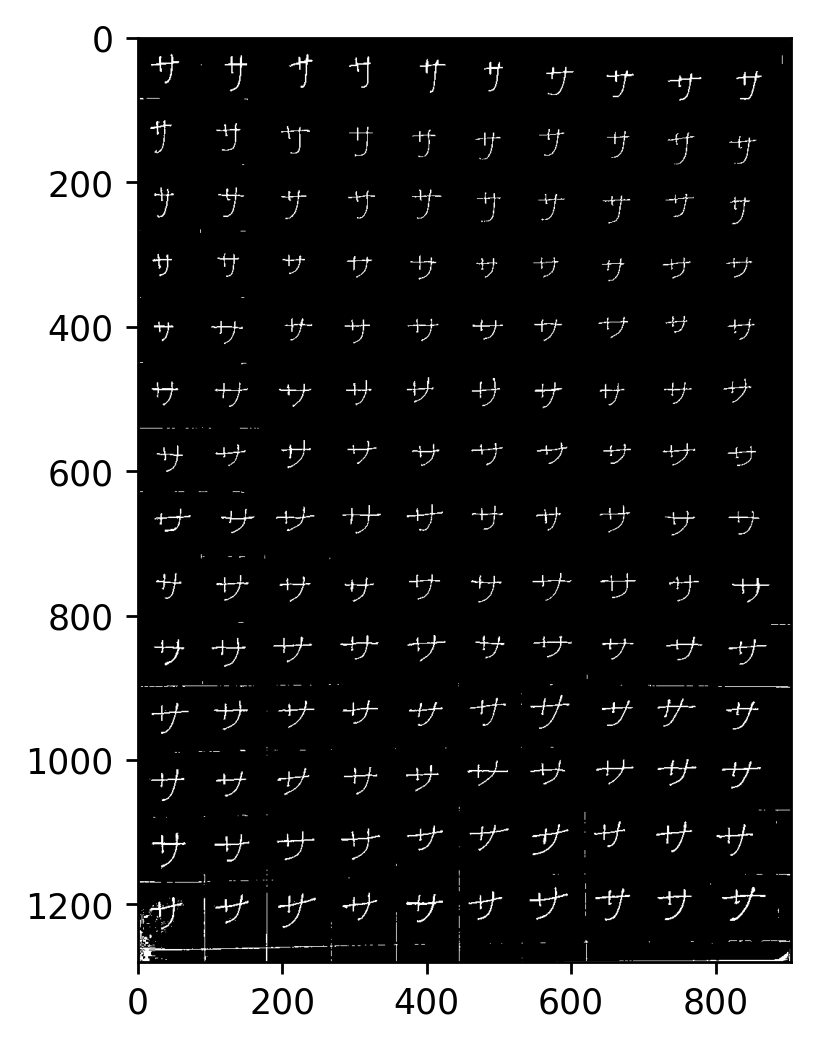

In [25]:
_, img_bin = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)
img_bin[0:100, 0:w] = first_row_bin
plt.imshow(img_bin, cmap='gray')

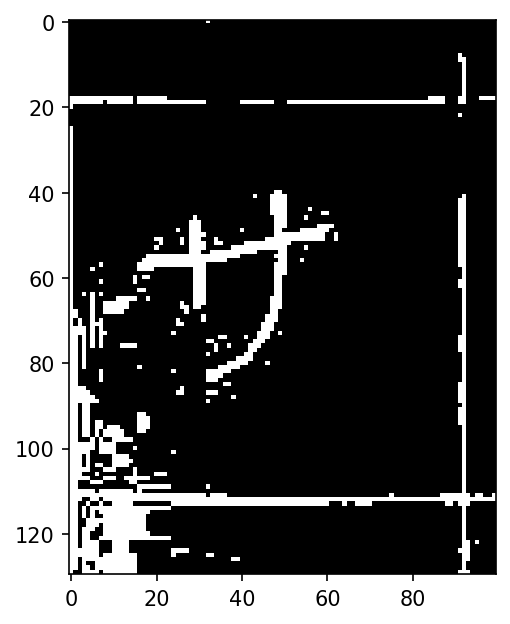

In [26]:
cropped = img_bin[1150:h, 0:100]

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

plt.imshow(cropped, cmap='gray')

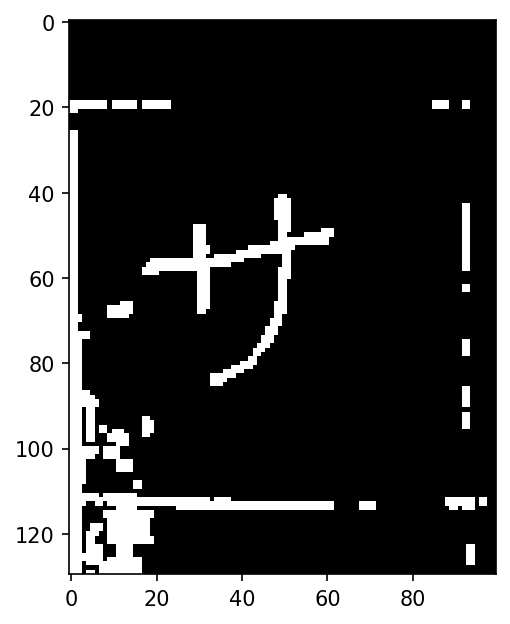

In [27]:
# чистим грязь
kernel = np.ones((2,2), np.uint8)
cropped = cv2.morphologyEx(cropped, cv2.MORPH_OPEN, kernel)
plt.imshow(cropped, cmap='gray')

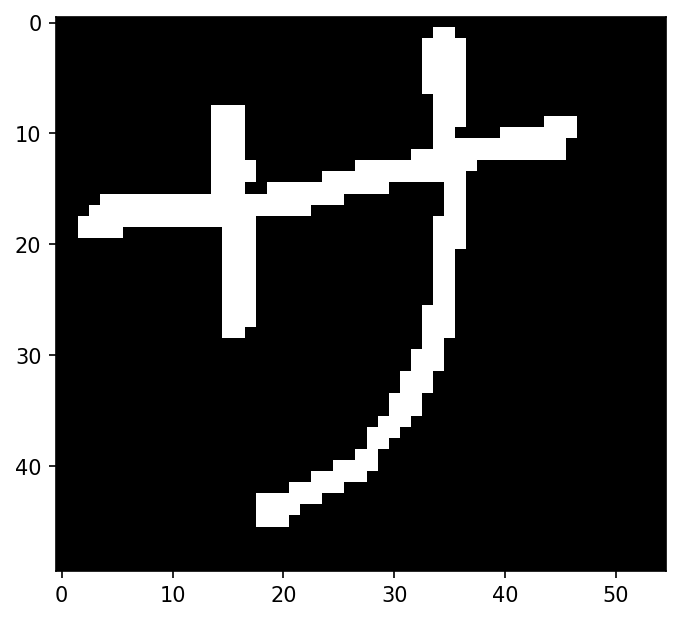

In [28]:
cropped_only_symbol = cropped[40:90, 15:70]
plt.imshow(cropped_only_symbol, cmap='gray')

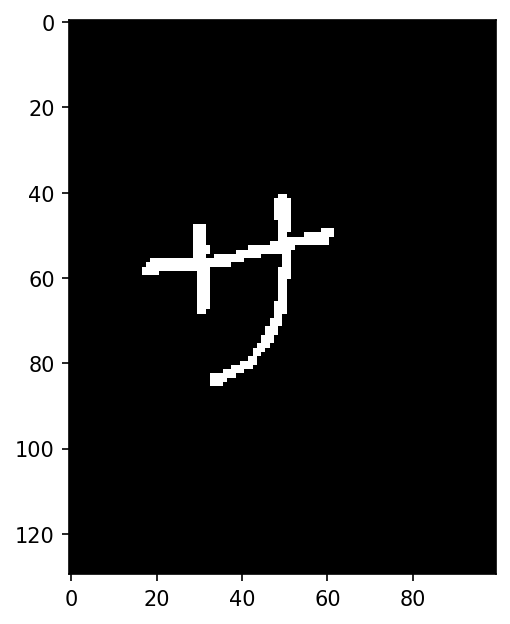

In [29]:
cleaned_cropped = np.zeros(cropped.shape, dtype="uint8") 
cleaned_cropped[40:90, 15:70] = cropped_only_symbol
plt.imshow(cleaned_cropped, cmap='gray')

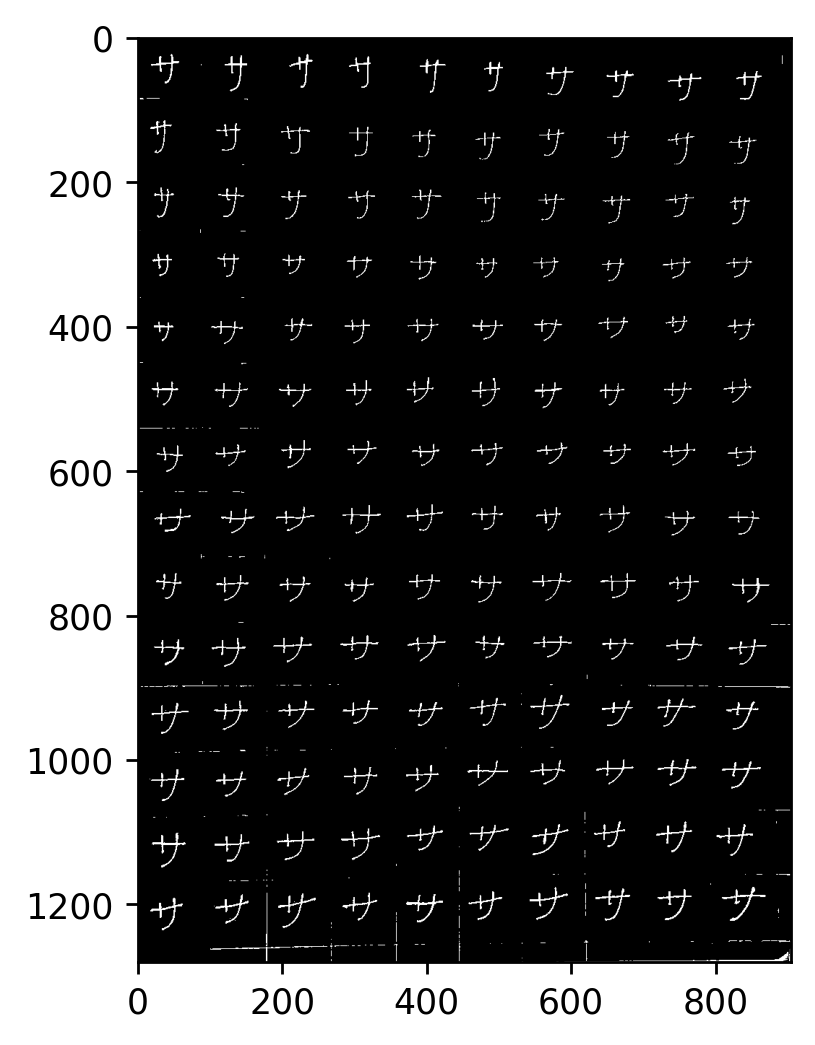

In [30]:
img_bin[1150:h, 0:100] = cleaned_cropped

plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250
plt.imshow(img_bin, cmap='gray')

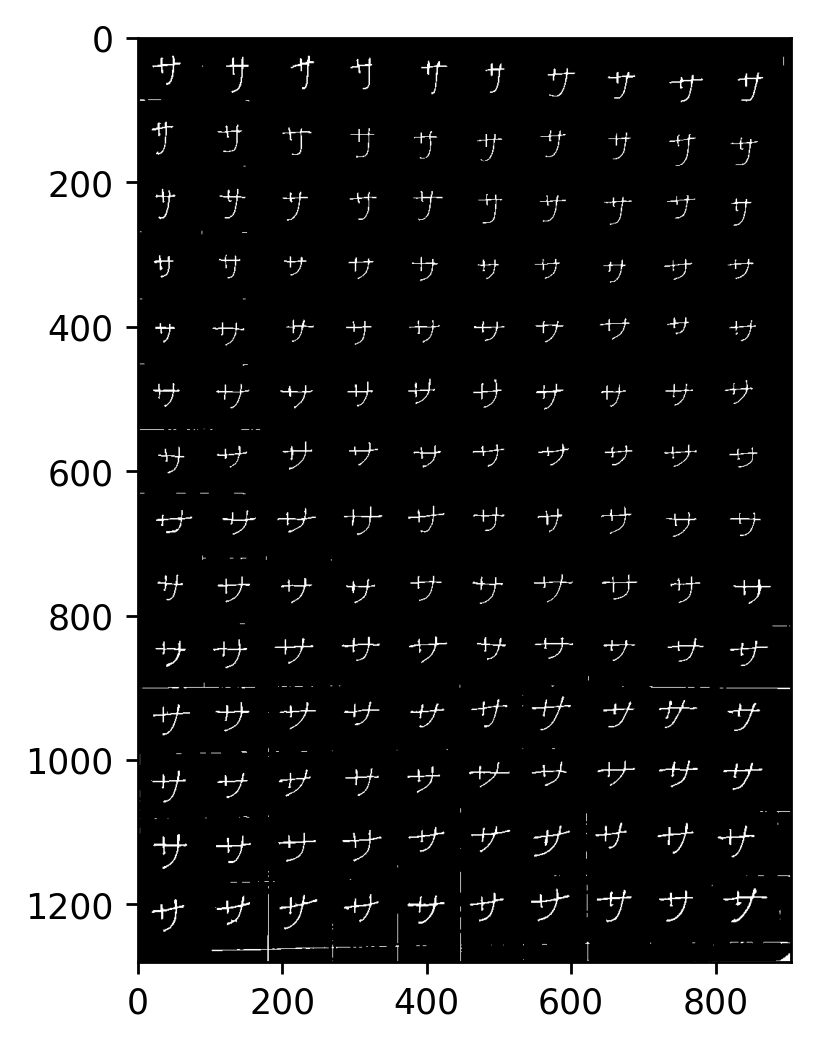

In [31]:
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel=np.ones((2,2), np.uint8), iterations=2)
plt.imshow(img_bin, cmap='gray')

In [32]:
cv2.imwrite('../data-prepared/0.jpg', img_bin)

True